In [6]:
import numpy as np
import math 
from matplotlib import pyplot as plt
from scipy.stats import poisson
from scipy.optimize import differential_evolution, least_squares, Bounds

# Problem 5

In [7]:
odds = np.array([1.74,1.86,1.57,12,1.95,2.23,1.53,4.1,4.25,4.25])
win_prob = 1 / odds
stakes = np.array([100,100,150,250,200,75,65,50,125,100])

n_trials = 10000
win_lose = np.ndarray([n_trials, len(win_prob)])

for i in range(len(win_prob)):
    b = np.random.binomial(1, win_prob[i], size=n_trials)
    b = np.astype(b, int)
    win_lose[:, i] = b

result = win_lose * stakes
result


array([[100., 100., 150., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,  50., 125.,   0.],
       [  0., 100., 150., ...,  50.,   0.,   0.],
       ...,
       [  0., 100., 150., ...,   0.,   0.,   0.],
       [  0.,   0., 150., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,  50.,   0.,   0.]])

In [8]:
payout = result * odds 
payout

array([[174.  , 186.  , 235.5 , ...,   0.  ,   0.  ,   0.  ],
       [174.  ,   0.  ,   0.  , ..., 205.  , 531.25,   0.  ],
       [  0.  , 186.  , 235.5 , ..., 205.  ,   0.  ,   0.  ],
       ...,
       [  0.  , 186.  , 235.5 , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  , 235.5 , ...,   0.  ,   0.  ,   0.  ],
       [174.  ,   0.  ,   0.  , ..., 205.  ,   0.  ,   0.  ]])

In [ ]:
total_payout = payout.sum(axis=1)


array([1016.7 , 1084.95, 1245.2 , ..., 1373.95,  360.  , 4108.  ])

In [10]:
total_profit = total_payout - stakes.sum()
total_profit

array([  37.2 , -205.3 , -198.5 , ..., -236.25, -322.8 , 2430.7 ])

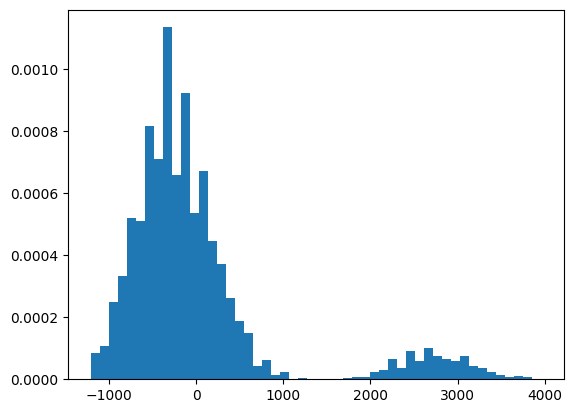

In [11]:
plt.hist(total_profit, bins=50, density=True)
plt.show()